In [6]:
#import split_folders
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

In [7]:
train=os.listdir('C:/MURA-v1.1/MURA-v1.1/train')

Text(0.5,1,'This is my XR_ELBOW Picture')

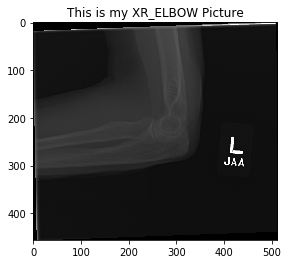

In [8]:
img = image.load_img('C:/MURA-v1.1/MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png')
plt.imshow(img)
plt.title('This is my XR_ELBOW Picture')

Text(0.5,1,'This is my XR_FOREARM Picture')

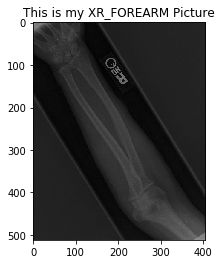

In [9]:
img1 = image.load_img('C:/MURA-v1.1/MURA-v1.1/train/XR_FOREARM/patient00063/study1_positive/image1.png')
plt.imshow(img1)
plt.title('This is my XR_FOREARM Picture')

Text(0.5,1,'This is my XR_ELBOW Picture')

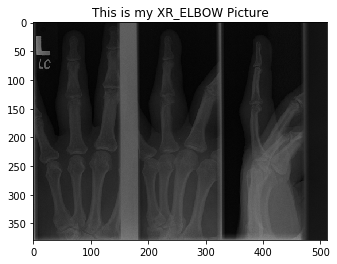

In [10]:
img = image.load_img('C:/MURA-v1.1/MURA-v1.1/train/XR_FINGER/patient00011/study1_negative/image1.png')
plt.imshow(img)
plt.title('This is my XR_ELBOW Picture')

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) 
training_set = train_datagen.flow_from_directory('C:/MURA-v1.1/MURA-v1.1/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32
                                                 )
validation_generator = test_datagen.flow_from_directory('C:/MURA-v1.1/MURA-v1.1/valid/',
    target_size=(64, 64),
    batch_size=32)


Found 36806 images belonging to 7 classes.
Found 3197 images belonging to 7 classes.


In [16]:
cnn = Sequential()
cnn.add(Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (3, 3)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(Conv2D(128, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (3, 3)))
cnn.add(Flatten())
cnn.add(Dense(units=64,activation = 'relu'))
cnn.add(Dense(units=32,activation = 'relu'))
cnn.add(Dense(units=7, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
__________

In [19]:

cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs =50)

Epoch 1/50
10/10 [==============================] - 38s 4s/step - loss: 1.6896 - acc: 0.3937
Epoch 2/50
10/10 [==============================] - 31s 3s/step - loss: 1.6646 - acc: 0.4156
Epoch 3/50
10/10 [==============================] - 29s 3s/step - loss: 1.5766 - acc: 0.4594
Epoch 4/50
10/10 [==============================] - 29s 3s/step - loss: 1.4478 - acc: 0.4906
Epoch 5/50
10/10 [==============================] - 28s 3s/step - loss: 1.6123 - acc: 0.4281
Epoch 6/50
10/10 [==============================] - 30s 3s/step - loss: 1.5542 - acc: 0.4344
Epoch 7/50
10/10 [==============================] - 30s 3s/step - loss: 1.5216 - acc: 0.4406
Epoch 8/50
10/10 [==============================] - 31s 3s/step - loss: 1.4353 - acc: 0.4938
Epoch 9/50
10/10 [==============================] - 37s 4s/step - loss: 1.4390 - acc: 0.4562
Epoch 10/50
10/10 [==============================] - 30s 3s/step - loss: 1.3888 - acc: 0.4813
Epoch 11/50
10/10 [==============================] - 32s 3s/step - lo

In [20]:
valid=os.listdir('C:/MURA-v1.1/MURA-v1.1/valid')

In [21]:
test_accu = cnn.evaluate_generator(validation_generator,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 69.72161400679838 %


In [22]:
test_image = image.load_img('C:/MURA-v1.1/MURA-v1.1/train/XR_FINGER/patient00011/study1_negative/image1.png')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [23]:
cnn.predict_classes(test_image)

array([1], dtype=int64)